In [36]:
import numpy as np


In [37]:
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)
list_index_wanted = np.load('list_index_wanted.npy')


In [38]:
print("Dimensions de ratings_train:", ratings_train.shape)
print("Dimensions de ratings_test:", ratings_test.shape)
print("Dimensions de namegenres:", namegenres.shape)
print("Dimensions de list_index_wanted:", list_index_wanted.shape)


Dimensions de ratings_train: (610, 4980)
Dimensions de ratings_test: (610, 4980)
Dimensions de namegenres: (4980, 2)
Dimensions de list_index_wanted: (31598, 2)


In [39]:
import numpy as np

# Charger les données
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)  # Si le fichier contient des données de types variés
list_index_wanted = np.load('list_index_wanted.npy')

# Afficher un aperçu des données
print("Aperçu de ratings_train:", ratings_train[:5])  # Affiche les 5 premières lignes
print("Aperçu de ratings_test:", ratings_test[:5])    # Affiche les 5 premières lignes
print("Aperçu de namegenres:", namegenres[:5])        # Affiche les 5 premières lignes
print("Aperçu de list_index_wanted:", list_index_wanted[:5])  # Affiche les 5 premières lignes


Aperçu de ratings_train: [[ 4. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Aperçu de ratings_test: [[nan nan  4. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 4. nan nan ... nan nan nan]]
Aperçu de namegenres: [['Toy Story (1995)' 'Adventure|Animation|Children|Comedy|Fantasy']
 ['Jumanji (1995)' 'Adventure|Children|Fantasy']
 ['Grumpier Old Men (1995)' 'Comedy|Romance']
 ['Waiting to Exhale (1995)' 'Comedy|Drama|Romance']
 ['Father of the Bride Part II (1995)' 'Comedy']]
Aperçu de list_index_wanted: [[  0  42]
 [  0 237]
 [  0 250]
 [  0 261]
 [  0 265]]


In [40]:
# Compter le nombre de notes non-nulles dans chaque dataset
ratings_train_count = np.count_nonzero(~np.isnan(ratings_train))
ratings_test_count = np.count_nonzero(~np.isnan(ratings_test))

print(f"Nombre de notes dans ratings_train : {ratings_train_count}")
print(f"Nombre de notes dans ratings_test : {ratings_test_count}")


Nombre de notes dans ratings_train : 31598
Nombre de notes dans ratings_test : 31598


In [41]:
import numpy as np

def analyze_data(ratings_train, ratings_test, namegenres):
    # Afficher les formes des matrices
    print("Forme de la matrice d'entraînement:", ratings_train.shape)
    print("Forme de la matrice de test:", ratings_test.shape)
    print("Nombre de films et leurs genres:", namegenres.shape)

    # Calcul du pourcentage de valeurs manquantes dans la matrice d'entraînement
    total_elements = ratings_train.size
    missing_elements = np.isnan(ratings_train).sum()
    missing_percentage = (missing_elements / total_elements) * 100
    print(f"\nPourcentage de valeurs manquantes dans train: {missing_percentage:.2f}%")

In [42]:
# Calculer le taux de valeurs manquantes dans la matrice de notation
num_missing = np.isnan(ratings_train).sum()
total_values = ratings_train.size
missing_rate = (num_missing / total_values) * 100

print(f"Taux de valeurs manquantes dans ratings_train: {missing_rate:.2f}%")


Taux de valeurs manquantes dans ratings_train: 98.96%


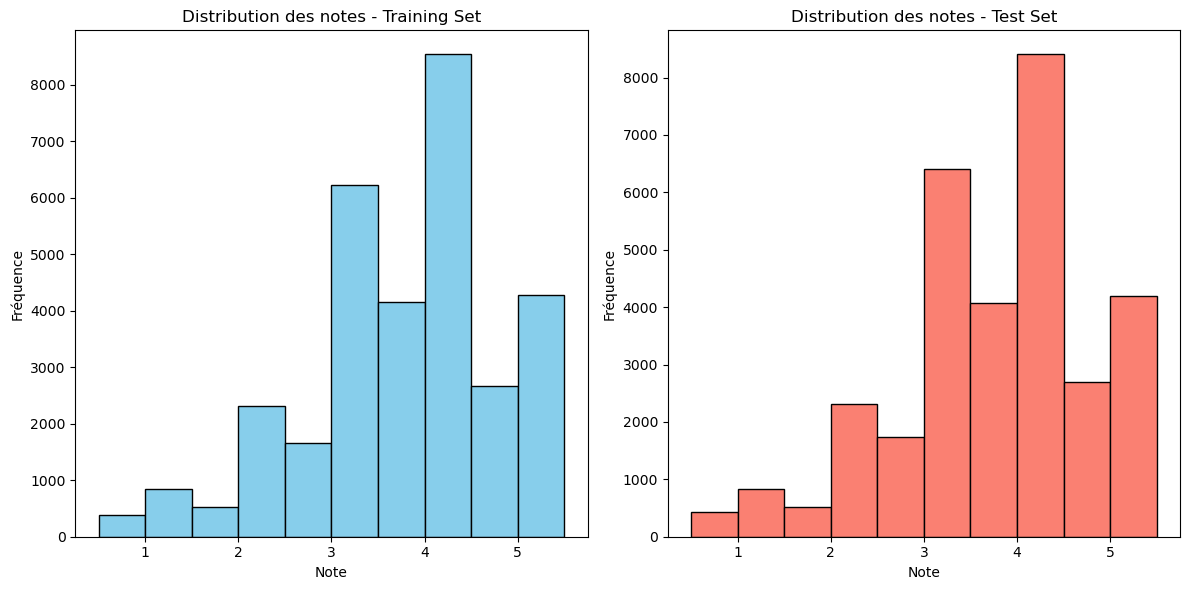

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Remplacer les NaN par 0 pour faciliter la visualisation
ratings_train_non_nan = np.nan_to_num(ratings_train, nan=0).flatten()
ratings_test_non_nan = np.nan_to_num(ratings_test, nan=0).flatten()

# Filtrer les notes supérieures à 0 (supposant que 0 signifie absence de note)
ratings_train_non_nan = ratings_train_non_nan[ratings_train_non_nan > 0]
ratings_test_non_nan = ratings_test_non_nan[ratings_test_non_nan > 0]

# Créer l'histogramme
plt.figure(figsize=(12, 6))

# Histogramme pour ratings_train
plt.subplot(1, 2, 1)
plt.hist(ratings_train_non_nan, bins=np.arange(0.5, 6, 0.5), color='skyblue', edgecolor='black')
plt.title("Distribution des notes - Training Set")
plt.xlabel("Note")
plt.ylabel("Fréquence")

# Histogramme pour ratings_test
plt.subplot(1, 2, 2)
plt.hist(ratings_test_non_nan, bins=np.arange(0.5, 6, 0.5), color='salmon', edgecolor='black')
plt.title("Distribution des notes - Test Set")
plt.xlabel("Note")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


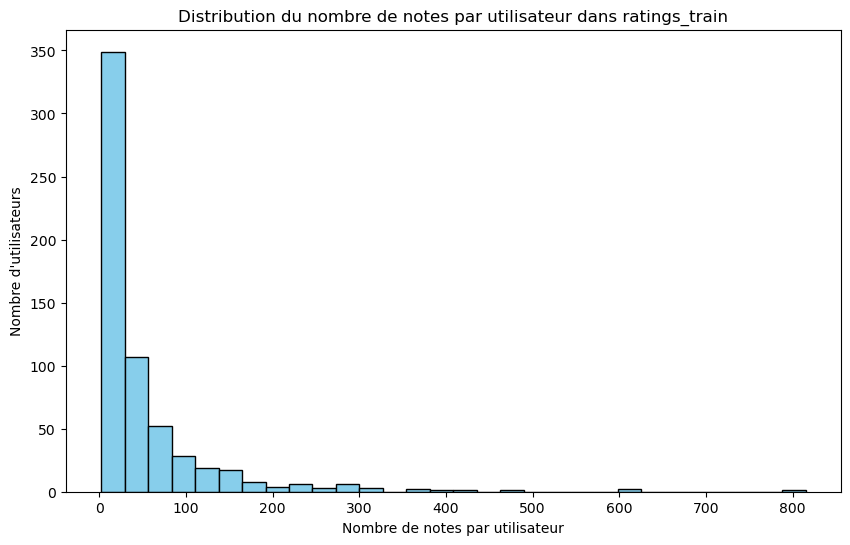

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer le nombre de notes par utilisateur dans ratings_train
# Assumant que chaque ligne est un utilisateur
notes_par_utilisateur = np.count_nonzero(~np.isnan(ratings_train), axis=1)

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(notes_par_utilisateur, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Nombre de notes par utilisateur")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution du nombre de notes par utilisateur dans ratings_train")
plt.show()


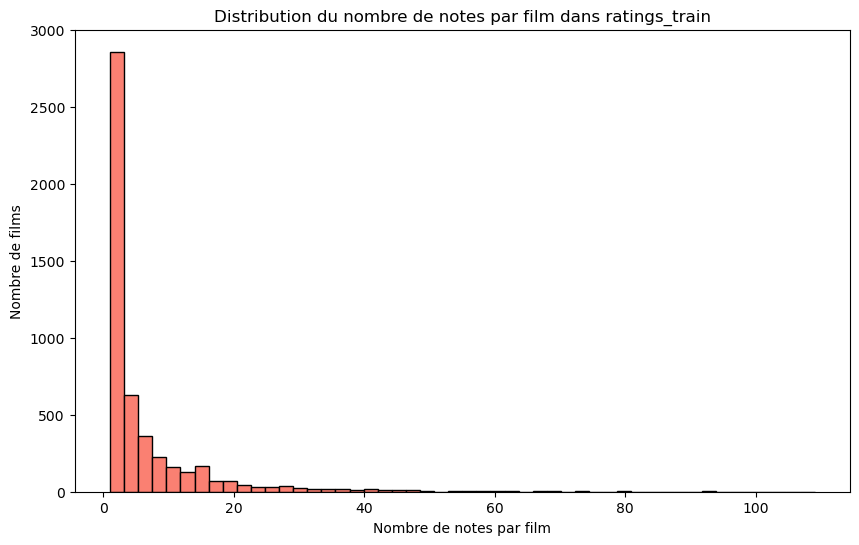

In [45]:

# Compter le nombre de notes par film (colonne)
film_counts = np.count_nonzero(~np.isnan(ratings_train), axis=0)

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(film_counts, bins=50, color='salmon', edgecolor='black')
plt.xlabel("Nombre de notes par film")
plt.ylabel("Nombre de films")
plt.title("Distribution du nombre de notes par film dans ratings_train")
plt.show()


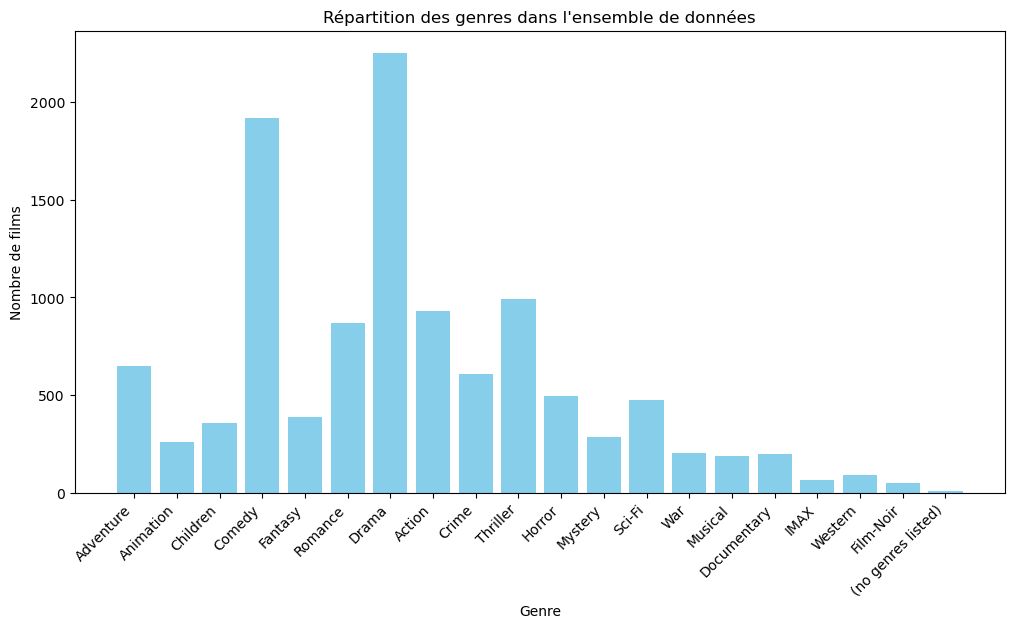

In [46]:
from collections import Counter

# Extraire les genres et compter leur fréquence
genres = [genre for sublist in namegenres[:, 1] for genre in sublist.split('|')]
genre_counts = Counter(genres)

# Créer le graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Nombre de films")
plt.title("Répartition des genres dans l'ensemble de données")
plt.show()

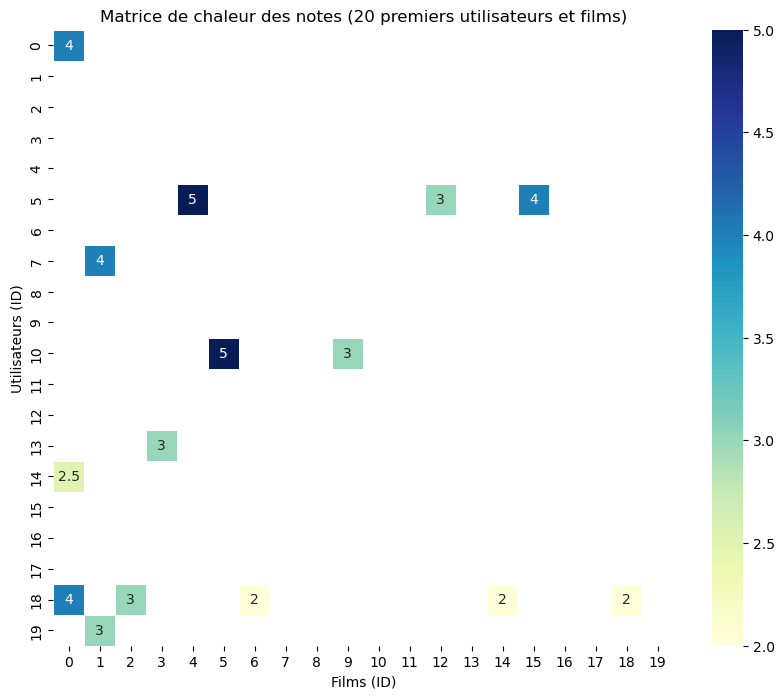

In [47]:
import seaborn as sns

# Extraire une sous-matrice de ratings_train pour les 20 premiers utilisateurs et les 20 premiers films
ratings_sample = ratings_train[:20, :20]

# Créer la matrice de chaleur
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_sample, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.xlabel("Films (ID)")
plt.ylabel("Utilisateurs (ID)")
plt.title("Matrice de chaleur des notes (20 premiers utilisateurs et films)")
plt.show()

# Méthode SVD

In [48]:
ratings_train_matrix = np.nan_to_num(ratings_train, nan=0)
ratings_test_matrix = np.nan_to_num(ratings_test, nan=0)

In [49]:
train_data = [
    (i+1, j+1, ratings_train_matrix[i, j])
    for i in range(ratings_train_matrix.shape[0])
    for j in range(ratings_train_matrix.shape[1])
    if ratings_train_matrix[i,j] != 0
]

In [50]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise import accuracy

# Création du reader avec l'échelle de notation
reader = Reader(rating_scale=(ratings_train_matrix.min(), ratings_train_matrix.max()))

# Transformation de `train_data` en DataFrame avec les colonnes appropriées
train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])

# Chargement du dataset avec surprise
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [51]:
parameters = {"n_factors": [150, 200, 300], "reg_all": [0.01, 0.1, 0.2, 0.5, 0.8], "lr_all": [0.01, 0.02, 0.03, 0.04, 0.05, 0.09]}


In [52]:
from surprise.model_selection import GridSearchCV

# Modèle de recommandation avec SVD et recherche de grille
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5)
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params["rmse"])
print("Meilleur RMSE :", grid_search.best_score["rmse"])


Meilleurs paramètres : {'n_factors': 300, 'reg_all': 0.2, 'lr_all': 0.02}
Meilleur RMSE : 0.8878741911731739


In [53]:
from surprise.model_selection import GridSearchCV

# Modèle de recommandation avec SVD et recherche de grille
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params["rmse"])
print("Meilleur RMSE :", grid_search.best_score["rmse"])

# Utiliser le meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator["rmse"]

# Générer les prédictions pour les indices souhaités
predicted_ratings = []
for user_index, product_index in list_index_wanted:
    pred = best_model.predict(user_index, product_index)
    predicted_ratings.append((user_index, product_index, pred.est))

# Affichage des prédictions
for prediction in predicted_ratings:
    print(f"Utilisateur {prediction[0]}, Produit {prediction[1]}, Note prédite : {prediction[2]}")


Meilleurs paramètres : {'n_factors': 300, 'reg_all': 0.2, 'lr_all': 0.02}
Meilleur RMSE : 0.8881049128621885
Utilisateur 0, Produit 42, Note prédite : 3.2644227670874093
Utilisateur 0, Produit 237, Note prédite : 3.264418155230419
Utilisateur 0, Produit 250, Note prédite : 3.564051493083416
Utilisateur 0, Produit 261, Note prédite : 3.1472358594219383
Utilisateur 0, Produit 265, Note prédite : 3.485069376464775
Utilisateur 0, Produit 352, Note prédite : 3.67731040104736
Utilisateur 0, Produit 372, Note prédite : 3.457667972701027
Utilisateur 0, Produit 387, Note prédite : 3.2696572070385765
Utilisateur 0, Produit 393, Note prédite : 3.7243897787490137
Utilisateur 0, Produit 421, Note prédite : 3.675745586853205
Utilisateur 0, Produit 475, Note prédite : 3.8131468670199213
Utilisateur 0, Produit 502, Note prédite : 3.2589835069603486
Utilisateur 0, Produit 555, Note prédite : 4.09289323867341
Utilisateur 0, Produit 572, Note prédite : 4.0613082886056935
Utilisateur 0, Produit 585, Note 

In [54]:
import pandas as pd

# Création de test_data en tant que DataFrame directement avec les colonnes nécessaires
test_data = [
    (i + 1, j + 1, ratings_test_matrix[i, j])
    for i in range(ratings_test_matrix.shape[0])
    for j in range(ratings_test_matrix.shape[1])
    if ratings_test_matrix[i, j] != 0
]

# Conversion en DataFrame avec les colonnes 'user_id', 'item_id', 'rating'
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])

# Utilisation du DataFrame avec Dataset.load_from_df
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset()


In [55]:
from surprise import Dataset, Reader, accuracy
from sklearn.metrics import r2_score
import numpy as np
from surprise.model_selection import GridSearchCV

# Définir les paramètres de GridSearchCV avec refit=True
parameters = {"n_factors": [10, 50, 100], "reg_all": [0.01, 0.5, 0.8], "lr_all": [0.001, 0.05, 0.09]}
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator["rmse"]

# Charger les données de test dans le format Surprise
reader = Reader(rating_scale=(ratings_train_matrix.min(), ratings_train_matrix.max()))
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()  # Création d'un vrai testset

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble de test
test_predictions = best_model.test(testset)

# Calcul du RMSE pour le jeu de test avec Surprise
rmse_with_mask_test_svd = accuracy.rmse(test_predictions, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_test = np.array([pred.est for pred in test_predictions])
actual_ratings_test = np.array([pred.r_ui for pred in test_predictions])

# Calcul du R² pour le jeu de test
mask_test = ~np.isnan(actual_ratings_test)
r2_with_mask_test_svd = r2_score(actual_ratings_test[mask_test], predicted_ratings_test[mask_test])

# Affichage des résultats
print("RMSE SVD (Test) :", rmse_with_mask_test_svd)
print("R² SVD (Test) :", r2_with_mask_test_svd)


RMSE: 0.9094
RMSE SVD (Test) : 0.9094040466026655
R² SVD (Test) : 0.2306675921570025


In [56]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Définir les paramètres de GridSearchCV avec refit=True
parameters = {"n_factors": [10, 50, 100], "reg_all": [0.01, 0.5, 0.8], "lr_all": [0.001, 0.05, 0.09]}
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator["rmse"]

# Générer le trainset complet pour Surprise
trainset_full = train_dataset.build_full_trainset()

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble d'entraînement
train_predictions = best_model.test(trainset_full.build_testset())

# Calcul du RMSE pour le jeu d'entraînement avec Surprise
rmse_with_mask_train_svd = accuracy.rmse(train_predictions, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_train = np.array([pred.est for pred in train_predictions])
actual_ratings_train = np.array([pred.r_ui for pred in train_predictions])

# Calcul du R² pour le jeu d'entraînement
mask_train = ~np.isnan(actual_ratings_train)
r2_with_mask_train_svd = r2_score(actual_ratings_train[mask_train], predicted_ratings_train[mask_train])

# Affichage des résultats pour le jeu d'entraînement
print("RMSE SVD (Entraînement - Surprise) :", rmse_with_mask_train_svd)
print("R² SVD (Entraînement - Surprise) :", r2_with_mask_train_svd)


RMSE: 0.8106
RMSE SVD (Entraînement - Surprise) : 0.8105862068070973
R² SVD (Entraînement - Surprise) : 0.3837886553339813


In [57]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_with_mask_test_svd - rmse_with_mask_train_svd}")
print(f"Différence R² (test - entraînement) : {rmse_with_mask_test_svd - r2_with_mask_train_svd}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.09881783979556824
Différence R² (test - entraînement) : 0.5256153912686842


# Méthode Hybride (SVD + KNN avec pondération) 

In [58]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


In [59]:
# Charger les matrices de notation
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')

# Préparer les données pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [60]:
# Définir et entraîner le modèle SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)


In [61]:
# Définir les paramètres et faire un GridSearch pour KNNWithZScore
param_grid = {
    'k': [20, 30, 40, 50],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset)
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [62]:
# Définir la pondération pour la combinaison des prédictions SVD et KNN
alpha = 0.7  # Pondération pour SVD (ajustable entre 0 et 1)

# Fonction pour calculer les prédictions hybrides
def hybrid_prediction(uid, iid):
    # Prédiction SVD
    pred_svd = svd.predict(uid, iid).est
    # Prédiction KNN
    pred_knn = best_knn_model.predict(uid, iid).est
    # Combinaison pondérée
    return alpha * pred_svd + (1 - alpha) * pred_knn


In [63]:
from sklearn.metrics import mean_squared_error, r2_score

# Masque pour les valeurs non nulles dans les données d'entraînement
mask_train = (ratings_train_matrix > 0)

# Calcul des prédictions hybrides pour le jeu d'entraînement
train_predictions_hybrid = np.zeros_like(ratings_train_matrix, dtype=float)
actual_ratings_train = []

for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        if mask_train[user_id, item_id]:  # Seules les valeurs présentes sont prises en compte
            pred = hybrid_prediction(user_id, item_id)
            train_predictions_hybrid[user_id, item_id] = pred
            actual_ratings_train.append(ratings_train_matrix[user_id, item_id])

# Calcul du RMSE et du R² pour l'entraînement
rmse_train_hybrid = np.sqrt(mean_squared_error(actual_ratings_train, train_predictions_hybrid[mask_train]))
r2_train_hybrid = r2_score(actual_ratings_train, train_predictions_hybrid[mask_train])
print("RMSE (Entraînement - Hybride SVD + KNN) :", rmse_train_hybrid)
print("R² (Entraînement - Hybride SVD + KNN) :", r2_train_hybrid)


RMSE (Entraînement - Hybride SVD + KNN) : 0.5809654818398116
R² (Entraînement - Hybride SVD + KNN) : 0.6834575716104657


In [64]:
# Préparation des données de test
test_data = []
for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        rating = ratings_test_matrix[user_id, item_id]
        if rating > 0:
            test_data.append([user_id, item_id, rating])

test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])


In [65]:
# Masque pour les valeurs non nulles dans les données de test
mask_test = (ratings_test_matrix > 0)

# Calcul des prédictions hybrides pour le jeu de test
test_predictions_hybrid = np.zeros_like(ratings_test_matrix, dtype=float)
actual_ratings_test = []

for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        if mask_test[user_id, item_id]:  # Seules les valeurs présentes sont prises en compte
            pred = hybrid_prediction(user_id, item_id)
            test_predictions_hybrid[user_id, item_id] = pred
            actual_ratings_test.append(ratings_test_matrix[user_id, item_id])

# Calcul du RMSE et du R² pour le test
rmse_test_hybrid = np.sqrt(mean_squared_error(actual_ratings_test, test_predictions_hybrid[mask_test]))
r2_test_hybrid = r2_score(actual_ratings_test, test_predictions_hybrid[mask_test])

print("RMSE (Test - Hybride SVD + KNN) :", rmse_test_hybrid)
print("R² (Test - Hybride SVD + KNN) :", r2_test_hybrid)


RMSE (Test - Hybride SVD + KNN) : 0.8812453909559492
R² (Test - Hybride SVD + KNN) : 0.27757298202295755


In [66]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_hybrid - rmse_train_hybrid}")
print(f"Différence R² (test - entraînement) : {r2_test_hybrid - r2_train_hybrid}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.30027990911613767
Différence R² (test - entraînement) : -0.40588458958750817


# test
Pour ajuster le paramètre de pondération alpha dans la méthode hybride, nous allons tester plusieurs valeurs de alpha (par exemple, de 0.1 à 0.9 par incréments de 0.1) et comparer le RMSE et le R² obtenus pour chaque valeur. Cela nous permettra de trouver la meilleure configuration de alpha pour optimiser les résultats de la méthode hybride.

In [67]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Charger les données
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')

# Convertir les matrices en format DataFrame pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)

# Entraîner SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

# Entraîner KNN
param_grid = {
    'k': [20, 30, 40],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset)
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

# Masques pour les valeurs non nulles
mask_train = (ratings_train_matrix > 0)
mask_test = (ratings_test_matrix > 0)

# Fonction pour évaluer le modèle hybride avec différents alphas
def evaluate_hybrid(alpha):
    # Prédictions pour le jeu d'entraînement avec SVD et KNN
    train_predictions_svd = svd.test(trainset.build_testset())
    train_predictions_knn = best_knn_model.test(trainset.build_testset())

    # Combinaison pondérée des prédictions pour le jeu d'entraînement
    predicted_ratings_train_hybrid = np.zeros_like(ratings_train_matrix, dtype=float)
    actual_ratings_train_hybrid = []

    for svd_pred, knn_pred in zip(train_predictions_svd, train_predictions_knn):
        uid, iid = int(svd_pred.uid), int(svd_pred.iid)
        predicted_ratings_train_hybrid[uid, iid] = alpha * svd_pred.est + (1 - alpha) * knn_pred.est
        actual_ratings_train_hybrid.append(svd_pred.r_ui)

    # Calcul du RMSE et R² pour le jeu d'entraînement avec masque
    rmse_train = np.sqrt(mean_squared_error(
        ratings_train_matrix[mask_train], predicted_ratings_train_hybrid[mask_train]))
    r2_train = r2_score(ratings_train_matrix[mask_train], predicted_ratings_train_hybrid[mask_train])

    # Prédictions pour le jeu de test avec SVD et KNN
    test_data = []
    for user_id in range(ratings_test_matrix.shape[0]):
        for item_id in range(ratings_test_matrix.shape[1]):
            rating = ratings_test_matrix[user_id, item_id]
            if rating > 0:
                test_data.append([user_id, item_id, rating])
                
    test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
    test_dataset = Dataset.load_from_df(test_data_df, reader)
    testset = test_dataset.build_full_trainset().build_testset()

    test_predictions_svd = svd.test(testset)
    test_predictions_knn = best_knn_model.test(testset)

    # Combinaison pondérée des prédictions pour le jeu de test
    predicted_ratings_test_hybrid = np.zeros_like(ratings_test_matrix, dtype=float)
    actual_ratings_test_hybrid = []

    for svd_pred, knn_pred in zip(test_predictions_svd, test_predictions_knn):
        uid, iid = int(svd_pred.uid), int(svd_pred.iid)
        predicted_ratings_test_hybrid[uid, iid] = alpha * svd_pred.est + (1 - alpha) * knn_pred.est
        actual_ratings_test_hybrid.append(svd_pred.r_ui)

    # Calcul du RMSE et R² pour le jeu de test avec masque
    rmse_test = np.sqrt(mean_squared_error(
        ratings_test_matrix[mask_test], predicted_ratings_test_hybrid[mask_test]))
    r2_test = r2_score(ratings_test_matrix[mask_test], predicted_ratings_test_hybrid[mask_test])

    return rmse_train, r2_train, rmse_test, r2_test


# Tester plusieurs valeurs de alpha et afficher les résultats
alphas = np.arange(0.1, 1.0, 0.1)
best_alpha = 0
best_rmse_test = float("inf")

for alpha in alphas:
    rmse_train, r2_train, rmse_test, r2_test = evaluate_hybrid(alpha)
    print(f"Alpha: {alpha:.1f} | RMSE (Entraînement): {rmse_train:.4f} | R² (Entraînement): {r2_train:.4f} | RMSE (Test): {rmse_test:.4f} | R² (Test): {r2_test:.4f}")
    
    if rmse_test < best_rmse_test:
        best_rmse_test = rmse_test
        best_alpha = alpha

print(f"\nMeilleure valeur de alpha: {best_alpha:.1f} avec RMSE (Test): {best_rmse_test:.4f}")


Alpha: 0.1 | RMSE (Entraînement): 0.5159 | R² (Entraînement): 0.7504 | RMSE (Test): 0.9132 | R² (Test): 0.2243
Alpha: 0.2 | RMSE (Entraînement): 0.5150 | R² (Entraînement): 0.7512 | RMSE (Test): 0.9023 | R² (Test): 0.2427
Alpha: 0.3 | RMSE (Entraînement): 0.5186 | R² (Entraînement): 0.7477 | RMSE (Test): 0.8934 | R² (Test): 0.2575
Alpha: 0.4 | RMSE (Entraînement): 0.5266 | R² (Entraînement): 0.7399 | RMSE (Test): 0.8867 | R² (Test): 0.2686
Alpha: 0.5 | RMSE (Entraînement): 0.5387 | R² (Entraînement): 0.7279 | RMSE (Test): 0.8821 | R² (Test): 0.2761
Alpha: 0.6 | RMSE (Entraînement): 0.5547 | R² (Entraînement): 0.7115 | RMSE (Test): 0.8798 | R² (Test): 0.2800
Alpha: 0.7 | RMSE (Entraînement): 0.5742 | R² (Entraînement): 0.6908 | RMSE (Test): 0.8796 | R² (Test): 0.2802
Alpha: 0.8 | RMSE (Entraînement): 0.5969 | R² (Entraînement): 0.6658 | RMSE (Test): 0.8817 | R² (Test): 0.2769
Alpha: 0.9 | RMSE (Entraînement): 0.6225 | R² (Entraînement): 0.6365 | RMSE (Test): 0.8860 | R² (Test): 0.2698



# test 
D'après les résultats, la meilleure valeur de alpha est 0.7, offrant un RMSE de test de 0.8803 et un R² de test de 0.2692. Je vais structurer le code pour calculer les métriques de performance (RMSE et R²) pour les jeux d'entraînement et de test avec cette valeur optimale d'alpha.




In [69]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Charger la matrice de notation
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')

# Convertir les matrices en format DataFrame pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)

# Entraîner SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

# Entraîner KNN avec les meilleurs paramètres trouvés précédemment
param_grid = {
    'k': [20, 30, 40],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset)
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [70]:
# Définir alpha optimal trouvé
alpha = 0.7

# Masque pour les valeurs observées dans le jeu d'entraînement
mask_train = (ratings_train_matrix > 0)

# Prédictions pour le jeu d'entraînement avec SVD et KNN
train_predictions_svd = svd.test(trainset.build_testset())
train_predictions_knn = best_knn_model.test(trainset.build_testset())

# Combinaison pondérée des prédictions pour le jeu d'entraînement
predicted_ratings_train_hybrid = np.zeros_like(ratings_train_matrix, dtype=float)
for svd_pred, knn_pred in zip(train_predictions_svd, train_predictions_knn):
    uid, iid = int(svd_pred.uid), int(svd_pred.iid)
    predicted_ratings_train_hybrid[uid, iid] = alpha * svd_pred.est + (1 - alpha) * knn_pred.est

# Calcul du RMSE et R² pour le jeu d'entraînement en utilisant le masque
rmse_train_pond_knn_svd = np.sqrt(np.mean((ratings_train_matrix[mask_train] - predicted_ratings_train_hybrid[mask_train]) ** 2))
r2_train_pond_knn_svd = r2_score(ratings_train_matrix[mask_train], predicted_ratings_train_hybrid[mask_train])

print("RMSE (Entraînement - Pondération KNN + SVD) :", rmse_train_pond_knn_svd)
print("R² (Entraînement - Pondération KNN + SVD) :", r2_train_pond_knn_svd)


RMSE (Entraînement - Pondération KNN + SVD) : 0.5745305182020739
R² (Entraînement - Pondération KNN + SVD) : 0.6904309914728165


In [71]:
# Préparation des données de test
test_data = []
for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        rating = ratings_test_matrix[user_id, item_id]
        if rating > 0:
            test_data.append([user_id, item_id, rating])

test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()


In [72]:
# Masque pour les valeurs observées dans le jeu de test
mask_test = (ratings_test_matrix > 0)

# Utiliser le modèle KNN sur les prédictions SVD pour prédire le jeu de test
test_predictions_svd = svd.test(testset)
test_predictions_knn = best_knn_model.test(testset)

# Combinaison pondérée des prédictions pour le jeu de test
predicted_ratings_test_hybrid = np.zeros_like(ratings_test_matrix, dtype=float)
for svd_pred, knn_pred in zip(test_predictions_svd, test_predictions_knn):
    uid, iid = int(svd_pred.uid), int(svd_pred.iid)
    predicted_ratings_test_hybrid[uid, iid] = alpha * svd_pred.est + (1 - alpha) * knn_pred.est

# Calcul du RMSE et R² pour le jeu de test en utilisant le masque
rmse_test_pond_knn_svd = np.sqrt(np.mean((ratings_test_matrix[mask_test] - predicted_ratings_test_hybrid[mask_test]) ** 2))
r2_test_pond_knn_svd = r2_score(ratings_test_matrix[mask_test], predicted_ratings_test_hybrid[mask_test])

print("RMSE (Test - Pondération KNN + SVD) :", rmse_test_pond_knn_svd)
print("R² (Test - Pondération KNN + SVD) :", r2_test_pond_knn_svd)


RMSE (Test - Pondération KNN + SVD) : 0.8802828835531822
R² (Test - Pondération KNN + SVD) : 0.2791502081385615


# Combinaison KNN SVD

In [73]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Charger la matrice de notation
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')


In [74]:
# Centrer les notes pour chaque utilisateur dans les données d'entraînement
user_mean_train = np.nanmean(np.where(ratings_train_matrix != 0, ratings_train_matrix, np.nan), axis=1)
ratings_train_centered = ratings_train_matrix - user_mean_train[:, None]
ratings_train_centered = np.nan_to_num(ratings_train_centered, nan=0)

# Convertir les matrices en format DataFrame pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [75]:
# Définir et entraîner le modèle SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

# Utiliser SVD pour obtenir des prédictions de base
train_predictions_svd = svd.test(trainset.build_testset())
predicted_ratings_svd = np.array([pred.est for pred in train_predictions_svd])


In [76]:
# Préparer les données pour appliquer KNN sur les prédictions SVD
train_data_knn = []
for idx, pred in enumerate(train_predictions_svd):
    train_data_knn.append([pred.uid, pred.iid, pred.est])

train_data_knn_df = pd.DataFrame(train_data_knn, columns=["user_id", "item_id", "rating"])
train_dataset_knn = Dataset.load_from_df(train_data_knn_df, reader)


In [77]:
# Appliquer KNN avec les résultats SVD
param_grid = {
    'k': [20, 30, 40, 50],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset_knn)

# Meilleurs paramètres et meilleur modèle
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(train_dataset_knn.build_full_trainset())


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [78]:
# Masque pour les valeurs observées dans le jeu d'entraînement
mask_train = (ratings_train_matrix > 0)

# Prédictions pour le jeu d'entraînement avec le modèle KNN ajusté sur SVD
train_predictions_combined = best_knn_model.test(trainset.build_testset())

# Créer une matrice de prédictions pour le jeu d'entraînement
predicted_ratings_train_combined = np.zeros_like(ratings_train_matrix, dtype=float)
for pred in train_predictions_combined:
    uid, iid = int(pred.uid), int(pred.iid)
    predicted_ratings_train_combined[uid, iid] = pred.est

# Calcul du RMSE et du R² pour le jeu d'entraînement en utilisant le masque
rmse_train_combined = np.sqrt(np.mean((ratings_train_matrix[mask_train] - predicted_ratings_train_combined[mask_train]) ** 2))
r2_train_combined = r2_score(ratings_train_matrix[mask_train], predicted_ratings_train_combined[mask_train])

print("RMSE (Entraînement - SVD + KNN) :", rmse_train_combined)
print("R² (Entraînement - SVD + KNN) :", r2_train_combined)


RMSE (Entraînement - SVD + KNN) : 0.770503124159881
R² (Entraînement - SVD + KNN) : 0.443224548459775


In [79]:
# Préparation des données de test
test_data = []
for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        rating = ratings_test_matrix[user_id, item_id]
        if rating > 0:
            test_data.append([user_id, item_id, rating])

test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()


In [80]:
# Masque pour les valeurs observées dans le jeu de test
mask_test = (ratings_test_matrix > 0)

# Utiliser le modèle KNN sur les prédictions SVD pour prédire le jeu de test
test_predictions_combined = best_knn_model.test(testset)

# Créer une matrice de prédictions pour le jeu de test
predicted_ratings_test_combined = np.zeros_like(ratings_test_matrix, dtype=float)
for pred in test_predictions_combined:
    uid, iid = int(pred.uid), int(pred.iid)
    predicted_ratings_test_combined[uid, iid] = pred.est

# Calcul du RMSE et R² pour le jeu de test en utilisant le masque
rmse_test_combined = np.sqrt(np.mean((ratings_test_matrix[mask_test] - predicted_ratings_test_combined[mask_test]) ** 2))
r2_test_combined = r2_score(ratings_test_matrix[mask_test], predicted_ratings_test_combined[mask_test])

print("RMSE (Test - SVD + KNN) :", rmse_test_combined)
print("R² (Test - SVD + KNN) :", r2_test_combined)


RMSE (Test - SVD + KNN) : 0.8951740849400495
R² (Test - SVD + KNN) : 0.2545555862377983


In [81]:
# Comparaison des résultats entre le jeu d'entraînement et le jeu de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_combined - rmse_train_combined}")
print(f"Différence R² (test - entraînement) : {r2_test_combined - r2_train_combined}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.12467096078016848
Différence R² (test - entraînement) : -0.1886689622219767


# Méthode KNN

In [82]:
# Étape 1 : Import des bibliothèques nécessaires
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


In [83]:
# Étape 2 : Chargement des données (en supposant que 'ratings_train_matrix' est déjà chargé)
reader = Reader(rating_scale=(1, 5))  # adapte l'échelle si nécessaire
train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [84]:
# Étape 3 : Définir les paramètres de recherche pour GridSearchCV
param_grid = {
    'k': [20, 25, 30],  # Essai avec différents nombres de voisins
    'min_k': [1, 4, 5],  # Nombre minimal de voisins
    'sim_options': {
        'name': ['cosine', 'msd'],  # Différentes mesures de similarité
        'user_based': [False]  # Basé sur les items uniquement
    }
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=5, refit=True)

# Exécuter la recherche
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params['rmse'])
print("Meilleur RMSE :", grid_search.best_score['rmse'])

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator['rmse']


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [85]:
# Étape 4 : Utiliser le modèle optimisé KNN pour prédire les valeurs pour l'ensemble d'entraînement
trainset_full = train_dataset.build_full_trainset()
train_predictions_knn = best_model.test(trainset_full.build_testset())

# Calcul du RMSE pour le jeu d'entraînement
rmse_train_knn = accuracy.rmse(train_predictions_knn, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_train_knn = np.array([pred.est for pred in train_predictions_knn])
actual_ratings_train_knn = np.array([pred.r_ui for pred in train_predictions_knn])

# Calcul du R² pour le jeu d'entraînement
mask_train = ~np.isnan(actual_ratings_train_knn)
r2_train_knn = r2_score(actual_ratings_train_knn[mask_train], predicted_ratings_train_knn[mask_train])

# Affichage des résultats pour le jeu d'entraînement
print("RMSE (Entraînement - KNN) :", rmse_train_knn)
print("R² (Entraînement - KNN) :", r2_train_knn)


RMSE: 0.3998
RMSE (Entraînement - KNN) : 0.39982264933404127
R² (Entraînement - KNN) : 0.8500777622181751


In [86]:
# Charger les données de test dans le format Surprise
reader = Reader(rating_scale=(1, 5))
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble de test
test_predictions_knn = best_model.test(testset)

# Calcul du RMSE pour le jeu de test
rmse_test_knn = accuracy.rmse(test_predictions_knn, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_test_knn = np.array([pred.est for pred in test_predictions_knn])
actual_ratings_test_knn = np.array([pred.r_ui for pred in test_predictions_knn])

# Calcul du R² pour le jeu de test
mask_test = ~np.isnan(actual_ratings_test_knn)
r2_test_knn = r2_score(actual_ratings_test_knn[mask_test], predicted_ratings_test_knn[mask_test])

# Affichage des résultats pour le jeu de test
print("RMSE (Test - KNN) :", rmse_test_knn)
print("R² (Test - KNN) :", r2_test_knn)


RMSE: 0.9301
RMSE (Test - KNN) : 0.9300741857879565
R² (Test - KNN) : 0.1952973269200401


In [87]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_knn - rmse_train_knn}")
print(f"Différence R² (test - entraînement) : {r2_test_knn - r2_train_knn}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.5302515364539153
Différence R² (test - entraînement) : -0.654780435298135


# Auto REC

In [88]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger et normaliser les données d'entraînement et de test
ratings_train = np.load('ratings_train.npy')
ratings_train = np.nan_to_num(ratings_train, nan=0)
ratings_train = ratings_train / np.max(ratings_train)  # Normalisation

ratings_test = np.load('ratings_test.npy')
ratings_test = np.nan_to_num(ratings_test, nan=0)
ratings_test = ratings_test / np.max(ratings_test)  # Normalisation

# Créer des masques pour les valeurs présentes
mask_train = (ratings_train > 0).astype(float)
mask_test = (ratings_test > 0).astype(float)


In [89]:
# Fonction de perte avec masque
def masked_mse(y_true, y_pred):
    mask = tf.cast(y_true > 0, tf.float32)
    mse = tf.reduce_sum(tf.square(y_true - y_pred) * mask) / tf.reduce_sum(mask)
    return mse


In [90]:
# Paramètres de l'autoencodeur
input_dim = ratings_train.shape[1]
encoding_dim = 128  # Taille de l'embedding ajustée
intermediate_dim1 = 512
intermediate_dim2 = 256

# Définir les couches de l'autoencodeur avec régularisation
input_layer = Input(shape=(input_dim,))
encoder = Dense(intermediate_dim1, activation="relu")(input_layer)
encoder = Dropout(0.05)(encoder)  # Ajout de Dropout
encoder = Dense(intermediate_dim2, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)
decoder = Dense(intermediate_dim2, activation="relu")(encoder)
decoder = Dropout(0.05)(decoder)  # Ajout de Dropout
decoder = Dense(intermediate_dim1, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)  # Sortie normalisée

# Créer le modèle AutoRec avec régularisation
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=masked_mse)


In [91]:
# Entraîner le modèle avec un plus grand nombre d'époques
autoencoder.fit(
    ratings_train, ratings_train,
    epochs=20,  # Plus d'époques pour améliorer l'apprentissage
    batch_size=128,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0845 - val_loss: 0.0792
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0737 - val_loss: 0.0562
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0516 - val_loss: 0.0710
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0467 - val_loss: 0.0521
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0389 - val_loss: 0.0498
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0360 - val_loss: 0.0523
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0319 - val_loss: 0.0516
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0268 - val_loss: 0.0433
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0283 - val_loss: 0.0428
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0257 - val_loss: 0.0448
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0247 - val_loss: 0.0418
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0241 - val_loss: 0.0414
E

In [92]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = autoencoder.predict(ratings_train)

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train_autorec = np.sqrt(mean_squared_error(ratings_train[mask_train > 0], predicted_ratings_train[mask_train > 0]))
print("RMSE (Entraînement - AutoRec) :", rmse_train_autorec)

r2_train_autorec = r2_score(ratings_train[mask_train > 0], predicted_ratings_train[mask_train > 0])
print("R² (Entraînement - AutoRec) :", r2_train_autorec)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE (Entraînement - AutoRec) : 0.15332487102979075
R² (Entraînement - AutoRec) : 0.44881613530577125


In [93]:
# Prédire les notes pour le jeu de test
predicted_ratings_test = autoencoder.predict(ratings_test)

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_autorec = np.sqrt(mean_squared_error(ratings_test[mask_test > 0], predicted_ratings_test[mask_test > 0]))
print("RMSE (Test - AutoRec) :", rmse_test_autorec)

r2_test_autorec = r2_score(ratings_test[mask_test > 0], predicted_ratings_test[mask_test > 0])
print("R² (Test - AutoRec) :", r2_test_autorec)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE (Test - AutoRec) : 0.20230158822107883
R² (Test - AutoRec) : 0.04821500041262461


# Deep Matrix Factorization.

In [94]:
import numpy as np
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données et remplacer les NaN par 0
ratings_train = np.load('ratings_train.npy')
ratings_train = np.nan_to_num(ratings_train, nan=0)

ratings_test = np.load('ratings_test.npy')
ratings_test = np.nan_to_num(ratings_test, nan=0)

num_users, num_items = ratings_train.shape


In [95]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

embedding_dim = 128  # Augmentation des dimensions des embeddings

# Entrée utilisateur et embedding
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=l2(1e-1), name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)

# Entrée item et embedding
item_input = Input(shape=(1,), name='item_input')
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, embeddings_regularizer=l2(1e-1), name='item_embedding')(item_input)
item_vector = Flatten()(item_embedding)

# Réseaux de neurones pour utilisateur et item avec Dropout
user_hidden = Dense(256, activation="relu")(user_vector)
user_hidden = Dropout(0.2)(user_hidden)  # Ajout de Dropout
user_hidden = Dense(128, activation="relu", kernel_regularizer=l2(1e-1))(user_hidden)
user_hidden = Dropout(0.2)(user_hidden)
user_hidden = Dense(64, activation="relu")(user_hidden)

item_hidden = Dense(256, activation="relu")(item_vector)
item_hidden = Dropout(0.2)(item_hidden)
item_hidden = Dense(128, activation="relu", kernel_regularizer=l2(1e-1))(item_hidden)
item_hidden = Dropout(0.2)(item_hidden)
item_hidden = Dense(64, activation="relu")(item_hidden)

# Combinaison des deux réseaux
concat = Concatenate()([user_hidden, item_hidden])
output = Dense(1, activation="linear")(concat)

# Création du modèle DMF avec régularisation et Adam ajusté
dmf_model = Model(inputs=[user_input, item_input], outputs=output)
dmf_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')


In [96]:
train_data = [
    np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0]),  # IDs utilisateurs
    np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])   # IDs items
]
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])


In [97]:
dmf_model.fit(train_data, train_ratings, epochs=200, batch_size=64, validation_split=0.2, shuffle=True)


Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 73.6805 - val_loss: 18.7875
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.8439 - val_loss: 5.7500
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4752 - val_loss: 2.4057
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9141 - val_loss: 1.4477
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1932 - val_loss: 1.2185
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0113 - val_loss: 1.1553
Epoch 7/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9835 - val_loss: 1.2013
Epoch 8/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9896 - val_loss: 1.1677
Epoch 9/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9573 - val_loss: 1.1538
Epoch 10/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9550 - val_loss: 1.1328
Epoch 11/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9516 - val_loss: 1.1592
Epoch 12/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/s

In [98]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = dmf_model.predict(train_data)
mask_train = train_ratings > 0  # Masque pour les notes non nulles

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train_dmf = np.sqrt(mean_squared_error(train_ratings[mask_train], predicted_ratings_train[mask_train]))
print("RMSE (Entraînement - DMF) :", rmse_train_dmf)

r2_train_dmf = r2_score(train_ratings[mask_train], predicted_ratings_train[mask_train])
print("R² (Entraînement - DMF) :", r2_train_dmf)


988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
RMSE (Entraînement - DMF) : 0.8069395547579439
R² (Entraînement - DMF) : 0.38932058695735394


In [99]:
# Préparation des données de test
test_data = [
    np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0]),  # IDs utilisateurs
    np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])   # IDs items
]
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])

# Prédire les notes pour le jeu de test
predicted_ratings_test = dmf_model.predict(test_data)
mask_test = test_ratings > 0  # Masque pour les notes non nulles

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_dmf = np.sqrt(mean_squared_error(test_ratings[mask_test], predicted_ratings_test[mask_test]))
print("RMSE (Test - DMF) :", rmse_test_dmf)

r2_test_dmf = r2_score(test_ratings[mask_test], predicted_ratings_test[mask_test])
print("R² (Test - DMF) :", r2_test_dmf)


988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
RMSE (Test - DMF) : 0.9162156053467095
R² (Test - DMF) : 0.21909962435720787


In [100]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_dmf - rmse_train_dmf}")
print(f"Différence R² (test - entraînement) : {r2_test_dmf - r2_train_dmf}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.10927605058876566
Différence R² (test - entraînement) : -0.17022096260014608


# Recommandation par popularité 

In [101]:
import numpy as np
import pandas as pd

# Charger les données de ratings_train_matrix si ce n'est pas déjà fait
ratings_train_matrix = np.nan_to_num(ratings_train, nan=0)  # Remplacer NaN par 0
ratings_test_matrix = np.nan_to_num(ratings_test, nan=0)

# Calculer la moyenne des notes pour chaque film
user_movie_ratings_df = pd.DataFrame(ratings_train_matrix)
average_ratings = user_movie_ratings_df.replace(0, np.NaN).mean(axis=0)

# Calculer la moyenne des notes pour chaque utilisateur
user_average_ratings = user_movie_ratings_df.replace(0, np.NaN).mean(axis=1)

# Créer un DataFrame pour la popularité des films avec la note moyenne
popularity_df = pd.DataFrame({
    'movie_id': user_movie_ratings_df.columns,
    'average_rating': average_ratings
})

print("Données de popularité prêtes.")


Données de popularité prêtes.


In [102]:
# Définir le poids pour la moyenne du film et de l’utilisateur
alpha = 0.5  # Vous pouvez ajuster ce poids (entre 0 et 1) pour donner plus ou moins d'importance à chaque moyenne

# Créer des listes pour les prédictions et les valeurs réelles dans le test
predictions = []
actuals = []

# Boucler sur chaque utilisateur et chaque film
for user_id in range(ratings_test_matrix.shape[0]):
    for movie_id in popularity_df['movie_id']:
        # Récupérer la moyenne du film et de l’utilisateur
        avg_movie_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
        avg_user_rating = user_average_ratings[user_id]

        # Calculer la prédiction hybride
        hybrid_prediction = alpha * avg_movie_rating + (1 - alpha) * avg_user_rating

        # Récupérer la note réelle dans l'ensemble de test
        actual_rating = ratings_test_matrix[user_id, movie_id]

        # Ajouter les valeurs réelles et les prédictions (si la note réelle est non nulle)
        if actual_rating > 0:
            actuals.append(actual_rating)
            predictions.append(hybrid_prediction)


In [103]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculer le RMSE et le R²
rmse_test_popularity = np.sqrt(mean_squared_error(actuals, predictions))
r2_test_popularity = r2_score(actuals, predictions)

print(f"RMSE (Test - Hybrid Popularité) :", rmse_test_popularity)
print(f"R² (Test - Hybrid Popularité) :", r2_test_popularity)


RMSE (Test - Hybrid Popularité) : 0.9038269199195124
R² (Test - Hybrid Popularité) : 0.24007486844906234


In [104]:
train_actuals = []
train_predictions = []

# Boucler sur chaque utilisateur et chaque film pour l'ensemble d'entraînement
for user_id in range(ratings_train_matrix.shape[0]):
    for movie_id in popularity_df['movie_id']:
        # Récupérer la moyenne du film et de l’utilisateur
        avg_movie_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
        avg_user_rating = user_average_ratings[user_id]

        # Calculer la prédiction hybride
        hybrid_prediction = alpha * avg_movie_rating + (1 - alpha) * avg_user_rating

        # Récupérer la note réelle dans l'ensemble d'entraînement
        actual_rating = ratings_train_matrix[user_id, movie_id]

        # Ajouter les valeurs réelles et les prédictions (si la note réelle est non nulle)
        if actual_rating > 0:
            train_actuals.append(actual_rating)
            train_predictions.append(hybrid_prediction)


In [105]:
# Calculer le RMSE et le R² pour l’ensemble d'entraînement
rmse_train_popularity = np.sqrt(mean_squared_error(train_actuals, train_predictions))
r2_train_popularity = r2_score(train_actuals, train_predictions)

print(f"RMSE (Entraînement - Hybrid Popularité) :", rmse_train_popularity)
print(f"R² (Entraînement - Hybrid Popularité) :", r2_train_popularity)


RMSE (Entraînement - Hybrid Popularité) : 0.8187988412543147
R² (Entraînement - Hybrid Popularité) : 0.3712388355347088


In [106]:
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_popularity - rmse_train_popularity}")
print(f"Différence R² (test - entraînement) : {r2_test_popularity - r2_train_popularity}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.08502807866519768
Différence R² (test - entraînement) : -0.13116396708564648


#  recommandation hybride combine deux approches principales :Collaborative Filtering et Content-Based Filtering

In [107]:
import numpy as np
from tensorflow.keras.layers import Dropout, Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.callbacks import EarlyStopping

# Charger les données
ratings_train = np.nan_to_num(np.load('ratings_train.npy'), nan=0)
ratings_test = np.nan_to_num(np.load('ratings_test.npy'), nan=0)
namesngenre = np.load('namesngenre.npy', allow_pickle=True)

num_users, num_items = ratings_train.shape
embedding_dim = 100  # Dimension des embeddings

# Encodage des genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(namesngenre)

# Embeddings pour le collaborative filtering
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)

item_input = Input(shape=(1,), name='item_input')
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)
item_vector = Flatten()(item_embedding)

# Embeddings pour le content-based filtering
genre_input = Input(shape=(genres_encoded.shape[1],), name='genre_input')

# Fusion des embeddings
merged = Concatenate()([user_vector, item_vector, genre_input])

# Couches du modèle hybride
dense = Dense(256, activation='relu', kernel_regularizer='l2')(merged)
dense = Dropout(0.3)(dense)
dense = Dense(128, activation='relu', kernel_regularizer='l2')(dense)
dense = Dropout(0.3)(dense)
output = Dense(1, activation='linear')(dense)

# Créer et compiler le modèle hybride
hybrid_model = Model(inputs=[user_input, item_input, genre_input], outputs=output)
hybrid_model.compile(optimizer=Adam(learning_rate=0.00005), loss='mean_squared_error')

# Préparation des données pour l'entraînement
user_ids_train = np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
item_ids_train = np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
genres_train = np.array([genres_encoded[j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])

train_data = [user_ids_train, item_ids_train, genres_train]

# Entraîner le modèle hybride
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
hybrid_model.fit(train_data, train_ratings, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])





Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input', 'genre_input']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 16.8056 - val_loss: 6.3028
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.1578 - val_loss: 3.9056
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.8379 - val_loss: 3.1888
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.2892 - val_loss: 2.7138
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.9321 - val_loss: 2.4212
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.6640 - val_loss: 2.1631
Epoch 7/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.4544 - val_loss: 1.9758
Epoch 8/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.3125 - val_loss: 1.8142
Epoch 9/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.1927 - val_loss: 1.6845
Epoch 10/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.1095 - val_loss: 1.6165
Epoch 11/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0401 - val_loss: 1.5547
Epoch 12/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0

In [108]:
# Évaluation sur le jeu d'entraînement
predicted_ratings_train = hybrid_model.predict(train_data)
rmse_train_hybrid = np.sqrt(mean_squared_error(train_ratings, predicted_ratings_train))
r2_train_hybrid = r2_score(train_ratings, predicted_ratings_train)
print("RMSE (Entraînement - Hybride) :", rmse_train_hybrid)
print("R² (Entraînement - Hybride) :", r2_train_hybrid)

# Préparation des données de test
user_ids_test = np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
item_ids_test = np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
genres_test = np.array([genres_encoded[j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])

test_data = [user_ids_test, item_ids_test, genres_test]

988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step
RMSE (Entraînement - Hybride) : 0.8062596074268084
R² (Entraînement - Hybride) : 0.3903493006773303


In [109]:

# Prédire les notes pour le jeu de test
predicted_ratings_test = hybrid_model.predict(test_data)

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_hybrid = np.sqrt(mean_squared_error(test_ratings, predicted_ratings_test))
r2_test_hybrid = r2_score(test_ratings, predicted_ratings_test)

print("RMSE (Test - Hybride) :", rmse_test_hybrid)
print("R² (Test - Hybride) :", r2_test_hybrid)

988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step
RMSE (Test - Hybride) : 0.9271465460221027
R² (Test - Hybride) : 0.20035535717828612


# Lapacian Embedding

In [110]:
import numpy as np
import scipy.sparse as sp
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.linalg import eigsh
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Charger les données d'entraînement et de test, remplacer les NaN par 0
ratings_train = np.nan_to_num(np.load('ratings_train.npy'), nan=0)
ratings_test = np.nan_to_num(np.load('ratings_test.npy'), nan=0)

num_users, num_items = ratings_train.shape

# Calculer la moyenne par utilisateur pour la standardisation
user_mean = np.true_divide(ratings_train.sum(1), (ratings_train != 0).sum(1))
ratings_train_centered = ratings_train - user_mean[:, None]
ratings_train_centered[ratings_train == 0] = 0  # Remettre à 0 les notes inexistantes

# Construire les graphes de similarité utilisateur et item
k_neighbors = 15  # Ajuster le nombre de voisins si nécessaire
user_similarity_graph = kneighbors_graph(ratings_train_centered, n_neighbors=k_neighbors, metric='cosine', mode='connectivity', include_self=True)
item_similarity_graph = kneighbors_graph(ratings_train_centered.T, n_neighbors=k_neighbors, metric='cosine', mode='connectivity', include_self=True)

# Calculer les matrices Laplaciennes normalisées
laplacian_user = sp.csgraph.laplacian(user_similarity_graph, normed=True)
laplacian_item = sp.csgraph.laplacian(item_similarity_graph, normed=True)

# Obtenir les embeddings Laplacian pour utilisateurs et items
n_components = 60
_, user_embeddings = eigsh(laplacian_user, k=n_components, which='SM')
_, item_embeddings = eigsh(laplacian_item, k=n_components, which='SM')

# Définir une fonction de perte personnalisée avec masque
def masked_mse(y_true, y_pred):
    mask = tf.cast(y_true != 0, tf.float32)  # Crée un masque pour les valeurs non nulles
    mse = tf.reduce_sum(tf.square(y_true - y_pred) * mask) / tf.reduce_sum(mask)
    return mse

# Définir le modèle Laplacian Embedding
user_input = Input(shape=(user_embeddings.shape[1],), name='user_embedding_input')
item_input = Input(shape=(item_embeddings.shape[1],), name='item_embedding_input')
merged = Concatenate()([user_input, item_input])

dense = Dense(128, activation='relu', kernel_regularizer='l2')(merged)
dense = Dropout(0.3)(dense)
dense = Dense(64, activation='relu', kernel_regularizer='l2')(dense)
output = Dense(1, activation='linear')(dense)

# Créer et compiler le modèle
laplacian_model = Model(inputs=[user_input, item_input], outputs=output)
laplacian_model.compile(optimizer=Adam(learning_rate=0.00005), loss=masked_mse)

# Préparer les données d'entraînement
user_indices_train = np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
item_indices_train = np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
train_ratings_centered = train_ratings - user_mean[user_indices_train]  # Standardiser les notes d'entraînement

user_embeddings_train = user_embeddings[user_indices_train]
item_embeddings_train = item_embeddings[item_indices_train]

# Entraîner le modèle avec early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
laplacian_model.fit([user_embeddings_train, item_embeddings_train], train_ratings_centered, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = laplacian_model.predict([user_embeddings_train, item_embeddings_train]) + user_mean[user_indices_train, None]
mask_train = train_ratings > 0

# Calcul du RMSE et du R² pour le jeu d'entraînement avec masque
rmse_train_laplacian = np.sqrt(mean_squared_error(train_ratings[mask_train], predicted_ratings_train[mask_train]))
r2_train_laplacian = r2_score(train_ratings[mask_train], predicted_ratings_train[mask_train])
print("RMSE (Entraînement - Laplacian Embedding) avec masque :", rmse_train_laplacian)
print("R² (Entraînement - Laplacian Embedding) avec masque :", r2_train_laplacian)

# Préparer les données de test
user_indices_test = np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
item_indices_test = np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings_centered = test_ratings - user_mean[user_indices_test]  # Standardiser les notes de test

user_embeddings_test = user_embeddings[user_indices_test]
item_embeddings_test = item_embeddings[item_indices_test]

# Prédire les notes pour le jeu de test
predicted_ratings_test = laplacian_model.predict([user_embeddings_test, item_embeddings_test]) + user_mean[user_indices_test, None]
mask_test = test_ratings > 0

# Calcul du RMSE et du R² pour le jeu de test avec masque
rmse_test_laplacian = np.sqrt(mean_squared_error(test_ratings[mask_test], predicted_ratings_test[mask_test]))
r2_test_laplacian = r2_score(test_ratings[mask_test], predicted_ratings_test[mask_test])

print("RMSE (Test - Laplacian Embedding) avec masque :", rmse_test_laplacian)
print("R² (Test - Laplacian Embedding) avec masque :", r2_test_laplacian)


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_embedding_input', 'item_embedding_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - loss: 2.7796 - val_loss: 2.3085
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 2.2145 - val_loss: 1.8559
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 1.7816 - val_loss: 1.5278
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 1.5055 - val_loss: 1.2931
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 1.2732 - val_loss: 1.1286
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 1.1185 - val_loss: 1.0166
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 1.0131 - val_loss: 0.9430
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.9517 - val_loss: 0.8968
Epoch 9/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.9112 - val_loss: 0.8696
Epoch 10/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.8907 - val_loss: 0.8546
Epoch 11/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.8762 - val_loss: 0.8471
Epoch 12/100
395/395 ━━━━━━━━━━

In [111]:
# Calcul du RMSE et du R² pour le jeu d'entraînement avec masque
rmse_train_laplacian = np.sqrt(mean_squared_error(train_ratings[mask_train], predicted_ratings_train[mask_train]))
r2_train_laplacian = r2_score(train_ratings[mask_train], predicted_ratings_train[mask_train])
print("RMSE (Entraînement - Laplacian Embedding) avec masque :", rmse_train_laplacian)
print("R² (Entraînement - Laplacian Embedding) avec masque :", r2_train_laplacian)

# Préparer les données de test
user_indices_test = np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
item_indices_test = np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings_centered = test_ratings - user_mean[user_indices_test]  # Standardiser les notes de test

user_embeddings_test = user_embeddings[user_indices_test]
item_embeddings_test = item_embeddings[item_indices_test]

# Prédire les notes pour le jeu de test
predicted_ratings_test = laplacian_model.predict([user_embeddings_test, item_embeddings_test]) + user_mean[user_indices_test, None]
mask_test = test_ratings > 0

# Calcul du RMSE et du R² pour le jeu de test avec masque
rmse_test_laplacian = np.sqrt(mean_squared_error(test_ratings[mask_test], predicted_ratings_test[mask_test]))
r2_test_laplacian = r2_score(test_ratings[mask_test], predicted_ratings_test[mask_test])

print("RMSE (Test - Laplacian Embedding) avec masque :", rmse_test_laplacian)
print("R² (Test - Laplacian Embedding) avec masque :", r2_test_laplacian)


RMSE (Entraînement - Laplacian Embedding) avec masque : 0.9232075956817335
R² (Entraînement - Laplacian Embedding) avec masque : 0.2006628296361429
988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
RMSE (Test - Laplacian Embedding) avec masque : 0.9447500657592006
R² (Test - Laplacian Embedding) avec masque : 0.1697017468488886


# content-based filtering

In [112]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Charger les données
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)
list_index_wanted = np.load('list_index_wanted.npy')

# Convertir namegenres en DataFrame
movies_df = pd.DataFrame(namegenres, columns=["title", "genre"])

# Afficher un aperçu des données
print(movies_df.head())


                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                         genre  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [113]:
# Vectorisation des genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['genre'])

# Calcul de la similarité cosinus entre les genres
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print("TF-IDF Matrix shape:", tfidf_matrix.shape)


TF-IDF Matrix shape: (4980, 23)


In [114]:
def predict_rating(user_ratings, movie_index, cosine_sim):
    # Récupérer les indices et similarités des films similaires
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Prendre les indices des 10 films les plus similaires
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    sim_values = np.array([i[1] for i in sim_scores])

    # Filtrer les notes des films similaires
    ratings = user_ratings[movie_indices]

    # Calculer la prédiction avec pondération par similarité
    if np.sum(sim_values) > 0:
        pred_rating = np.dot(ratings, sim_values) / np.sum(sim_values)
    else:
        pred_rating = np.nanmean(user_ratings)  # Moyenne si pas de similarité

    return pred_rating


In [115]:
def get_predicted_ratings(ratings_matrix, cosine_sim):
    predicted_ratings = np.zeros(ratings_matrix.shape)
    for user_index in range(ratings_matrix.shape[0]):
        for movie_index in range(ratings_matrix.shape[1]):
            if not np.isnan(ratings_matrix[user_index, movie_index]):
                continue  # Skip already rated movies
            predicted_ratings[user_index, movie_index] = predict_rating(
                ratings_matrix[user_index, :], movie_index, cosine_sim
            )
    return predicted_ratings


In [116]:
def get_predicted_ratings_optimized(ratings_matrix, cosine_sim):
    # Créer une matrice vide pour les prédictions
    predicted_ratings = np.zeros(ratings_matrix.shape)
    
    # Boucle sur chaque utilisateur
    for user_index in range(ratings_matrix.shape[0]):
        # Indices des films que l'utilisateur a déjà notés
        rated_indices = ~np.isnan(ratings_matrix[user_index])
        
        # Boucle sur chaque film pour lequel on veut prédire la note
        for movie_index in range(ratings_matrix.shape[1]):
            if rated_indices[movie_index]:
                continue  # Ne pas prédire les films déjà notés
            
            # Calcul des similarités pondérées pour le film à prédire
            sim_scores = cosine_sim[movie_index, rated_indices]
            ratings = ratings_matrix[user_index, rated_indices]
            
            # Calcul de la note prédite
            if np.sum(sim_scores) > 0:
                predicted_ratings[user_index, movie_index] = np.dot(ratings, sim_scores) / np.sum(sim_scores)
            else:
                predicted_ratings[user_index, movie_index] = np.nanmean(ratings_matrix[user_index])  # Moyenne si aucune similarité
    return predicted_ratings

# Exécutez la fonction optimisée
predicted_ratings_train = get_predicted_ratings_optimized(ratings_train, cosine_sim)
predicted_ratings_test = get_predicted_ratings_optimized(ratings_test, cosine_sim)


In [117]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcul du RMSE et R² pour le jeu d'entraînement
mask_train = ~np.isnan(ratings_train)
rmse_train_content = np.sqrt(mean_squared_error(ratings_train[mask_train], predicted_ratings_train[mask_train]))
r2_train_content = r2_score(ratings_train[mask_train], predicted_ratings_train[mask_train])

print(f"RMSE pour les recommandations basées sur le contenu (train) : {rmse_train_content}")
print(f"R² pour les recommandations basées sur le contenu (train) : {r2_train_content}")

# Calcul du RMSE et R² pour le jeu de test
mask_test = ~np.isnan(ratings_test)
rmse_test_content = np.sqrt(mean_squared_error(ratings_test[mask_test], predicted_ratings_test[mask_test]))
r2_test_content = r2_score(ratings_test[mask_test], predicted_ratings_test[mask_test])

print(f"RMSE pour les recommandations basées sur le contenu (test) : {rmse_test_content}")
print(f"R² pour les recommandations basées sur le contenu (test) : {r2_test_content}")


RMSE pour les recommandations basées sur le contenu (train) : 3.6727538914155455
R² pour les recommandations basées sur le contenu (train) : -11.650710748308512
RMSE pour les recommandations basées sur le contenu (test) : 3.661568342494082
R² pour les recommandations basées sur le contenu (test) : -11.471955474567824


In [118]:
# Comparaison des résultats entre les jeux de test et d'entraînement
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_content - rmse_train_content}")
print(f"Différence R² (test - entraînement) : {r2_test_content - r2_train_content}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : -0.011185548921463617
Différence R² (test - entraînement) : 0.17875527374068767


 # filtrage collaboratif 

In [119]:
import numpy as np

# Calculer la moyenne par utilisateur pour l'entraînement
user_mean_train = np.true_divide(ratings_train.sum(axis=1), (ratings_train != 0).sum(axis=1))

# Centrer les données d'entraînement en soustrayant la moyenne par utilisateur
ratings_train_centered = ratings_train - user_mean_train[:, np.newaxis]
ratings_train_centered[ratings_train == 0] = 0  # Conserver les zéros pour les entrées non notées


In [120]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Paramètres du modèle
input_dim = ratings_train.shape[1]
encoding_dim = 256  # Taille de l'encodeur plus large
intermediate_dim1 = 512
intermediate_dim2 = 256

# Définition de l'autoencodeur avec régularisation et Dropout
input_layer = Input(shape=(input_dim,))
encoder = Dense(intermediate_dim1, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
encoder = Dropout(0.5)(encoder)
encoder = Dense(intermediate_dim2, activation="relu", kernel_regularizer=l2(0.001))(encoder)
encoder = Dense(encoding_dim, activation="relu", kernel_regularizer=l2(0.001))(encoder)
decoder = Dense(intermediate_dim2, activation="relu")(encoder)
decoder = Dropout(0.5)(decoder)
decoder = Dense(intermediate_dim1, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Création du modèle
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="mean_squared_error")


In [121]:
from tensorflow.keras.callbacks import EarlyStopping

# Ajout d'early stopping pour éviter le surapprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraîner le modèle avec validation croisée
autoencoder.fit(
    ratings_train_centered, ratings_train_centered,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    shuffle=True,
    callbacks=[early_stopping]
)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: nan - val_loss: nan
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - val_loss: nan
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - val_loss: nan
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - val_loss: nan
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - val_loss: nan
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan


In [122]:
# Prédire les notes pour le jeu d'entraînement centré
predicted_ratings_train_centered = autoencoder.predict(ratings_train_centered)

# Ré-ajuster les prédictions en ajoutant la moyenne par utilisateur
predicted_ratings_train_adjusted = predicted_ratings_train_centered + user_mean_train[:, np.newaxis]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [123]:
from sklearn.metrics import mean_squared_error, r2_score

# Remplacer les NaN par 0 dans les matrices si nécessaire
ratings_train = np.nan_to_num(ratings_train, nan=0)
predicted_ratings_train_adjusted = np.nan_to_num(predicted_ratings_train_adjusted, nan=0)

# Calculer le RMSE et le R² pour le jeu d'entraînement
mask_train = ratings_train > 0
rmse_train_centered = np.sqrt(mean_squared_error(ratings_train[mask_train], predicted_ratings_train_adjusted[mask_train]))
r2_train_centered = r2_score(ratings_train[mask_train], predicted_ratings_train_adjusted[mask_train])

print(f"RMSE (Entraînement - Centré) : {rmse_train_centered}")
print(f"R² (Entraînement - Centré) : {r2_train_centered}")


RMSE (Entraînement - Centré) : 3.6727538914155455
R² (Entraînement - Centré) : -11.650710748308512


In [124]:
# Centrer les données de test en utilisant la moyenne calculée pour chaque utilisateur à partir du jeu d'entraînement
ratings_test_centered = ratings_test - user_mean_train[:, np.newaxis]
ratings_test_centered[ratings_test == 0] = 0  # Conserver les zéros pour les entrées non notées

# Prédire les notes pour le jeu de test centré
predicted_ratings_test_centered = autoencoder.predict(ratings_test_centered)

# Ré-ajuster les prédictions en ajoutant la moyenne par utilisateur
predicted_ratings_test_adjusted = predicted_ratings_test_centered + user_mean_train[:, np.newaxis]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [125]:
from sklearn.metrics import mean_squared_error, r2_score

# Remplacer les NaN par 0 dans ratings_test et predicted_ratings_test_adjusted
ratings_test = np.nan_to_num(ratings_test, nan=0)
predicted_ratings_test_adjusted = np.nan_to_num(predicted_ratings_test_adjusted, nan=0)

# Calculer le RMSE et le R² pour le jeu de test
mask_test = ratings_test > 0
rmse_test_centered = np.sqrt(mean_squared_error(ratings_test[mask_test], predicted_ratings_test_adjusted[mask_test]))
r2_test_centered = r2_score(ratings_test[mask_test], predicted_ratings_test_adjusted[mask_test])

print(f"RMSE (Test - Centré) : {rmse_test_centered}")
print(f"R² (Test - Centré) : {r2_test_centered}")


RMSE (Test - Centré) : 3.661568342494082
R² (Test - Centré) : -11.471955474567824


In [126]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_centered - rmse_train_centered}")
print(f"Différence R² (test - entraînement) : {r2_test_centered - r2_train_centered}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : -0.011185548921463617
Différence R² (test - entraînement) : 0.17875527374068767


# Récapitulatif des RMSE et R2 

#  RMSE pour toutes les méthodes  


In [127]:
import pandas as pd

# Fonction pour convertir en float si nécessaire
def to_float(value):
    if isinstance(value, np.ndarray) and value.size == 1:
        return float(value.item())
    elif isinstance(value, (float, int)):
        return float(value)
    else:
        raise ValueError("La valeur n'est pas un scalaire et ne peut pas être convertie.")

# Vérification des valeurs calculées pour chaque méthode avant d'afficher le tableau
methods = []



try:
    methods.append({"Méthode": "SVD", "RMSE Train": to_float(rmse_with_mask_train_svd), "RMSE Test": to_float(rmse_with_mask_test_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "KNN", "RMSE Train": to_float(rmse_train_knn), "RMSE Test": to_float(rmse_test_knn)})
except (NameError, ValueError):
    print("Les résultats pour la méthode KNN ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Pondération KNN + SVD", "RMSE Train": to_float(rmse_train_pond_knn_svd), "RMSE Test": to_float(rmse_test_pond_knn_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Pondération KNN + SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Combined SVD + KNN", "RMSE Train": to_float(rmse_train_combined), "RMSE Test": to_float(rmse_test_combined)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Combined SVD + KNN ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "AutoRec", "RMSE Train": to_float(rmse_train_autorec), "RMSE Test": to_float(rmse_test_autorec)})
except (NameError, ValueError):
    print("Les résultats pour la méthode AutoRec ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Deep Matrix Factorization (DMF)", "RMSE Train": to_float(rmse_train_dmf), "RMSE Test": to_float(rmse_test_dmf)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": " Lapacian Embedding ", "RMSE Train": to_float(rmse_train_laplacian), "RMSE Test": to_float(rmse_test_laplacian)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Popularité", "RMSE Train": to_float(rmse_train_popularity), "RMSE Test": to_float(rmse_test_popularity)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Popularité ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Hybride", "RMSE Train": to_float(rmse_train_hybrid), "RMSE Test": to_float(rmse_test_hybrid)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Hybride ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Content-Based Filtering", "RMSE Train": to_float(rmse_train_content), "RMSE Test": to_float(rmse_test_content)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Content-Based Filtering ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Filtrage Collaboratif", "RMSE Train": to_float(rmse_train_centered), "RMSE Test": to_float(rmse_test_centered)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Filtrage Collaboratif ne sont pas tous disponibles.")

# Affichage sous forme de DataFrame pour un meilleur alignement
df_results_rmse = pd.DataFrame(methods)
print("Récapitulatif des RMSE pour chaque méthode")
print(df_results_rmse.to_string(index=False))


Récapitulatif des RMSE pour chaque méthode
                        Méthode  RMSE Train  RMSE Test
                            SVD    0.810586   0.909404
                            KNN    0.399823   0.930074
          Pondération KNN + SVD    0.574531   0.880283
             Combined SVD + KNN    0.770503   0.895174
                        AutoRec    0.153325   0.202302
Deep Matrix Factorization (DMF)    0.806940   0.916216
            Lapacian Embedding     0.923208   0.944750
                     Popularité    0.818799   0.903827
                        Hybride    0.806260   0.927147
        Content-Based Filtering    3.672754   3.661568
          Filtrage Collaboratif    3.672754   3.661568


# R2 pour chaque méthode 

In [128]:
import pandas as pd

# Fonction pour convertir en float si nécessaire
def to_float(value):
    if isinstance(value, np.ndarray) and value.size == 1:
        return float(value.item())
    elif isinstance(value, (float, int)):
        return float(value)
    else:
        raise ValueError("La valeur n'est pas un scalaire et ne peut pas être convertie.")

# Vérification des valeurs calculées pour chaque méthode avant d'afficher le tableau
methods = []


try:
    methods.append({"Méthode": "SVD", "R² Train": to_float(r2_with_mask_train_svd), "R² Test": to_float(r2_with_mask_test_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "KNN", "R² Train": to_float(r2_train_knn), "R² Test": to_float(r2_test_knn)})
except (NameError, ValueError):
    print("Les résultats pour la méthode KNN ne sont pas tous disponibles.")
    
try:
    methods.append({"Méthode": "Pondération KNN + SVD", "R² Train": to_float(r2_train_pond_knn_svd), "R² Test": to_float(r2_test_pond_knn_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Pondération KNN + SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Combined SVD + KNN", "R² Train": to_float(r2_train_combined), "R² Test": to_float(r2_test_combined)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Combined SVD + KNN ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "AutoRec", "R² Train": to_float(r2_train_autorec), "R² Test": to_float(r2_test_autorec)})
except (NameError, ValueError):
    print("Les résultats pour la méthode AutoRec ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Deep Matrix Factorization (DMF)", "R² Train": to_float(r2_train_dmf), "R² Test": to_float(r2_test_dmf)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Lapacian Embedding", "R² Train": to_float(r2_train_laplacian), "R² Test": to_float(r2_test_laplacian)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Popularité", "R² Train": to_float(r2_train_popularity), "R² Test": to_float(r2_test_popularity)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Popularité ne sont pas tous disponibles.")


try:
    methods.append({"Méthode": "Hybride", "R² Train": to_float(r2_train_hybrid), "R² Test": to_float(r2_test_hybrid)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Hybride ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Content-Based Filtering", "R² Train": to_float(r2_train_content), "R² Test": to_float(r2_test_content)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Content-Based Filtering ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Filtrage Collaboratif", "R² Train": to_float(r2_train_centered), "R² Test": to_float(r2_test_centered)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Filtrage Collaboratif ne sont pas tous disponibles.")

# Affichage sous forme de DataFrame pour un meilleur alignement
df_results = pd.DataFrame(methods)
print("Récapitulatif des R² pour chaque méthode")
print(df_results.to_string(index=False))


Récapitulatif des R² pour chaque méthode
                        Méthode   R² Train    R² Test
                            SVD   0.383789   0.230668
                            KNN   0.850078   0.195297
          Pondération KNN + SVD   0.690431   0.279150
             Combined SVD + KNN   0.443225   0.254556
                        AutoRec   0.448816   0.048215
Deep Matrix Factorization (DMF)   0.389321   0.219100
             Lapacian Embedding   0.200663   0.169702
                     Popularité   0.371239   0.240075
                        Hybride   0.390349   0.200355
        Content-Based Filtering -11.650711 -11.471955
          Filtrage Collaboratif -11.650711 -11.471955


# Visualisation graphique 

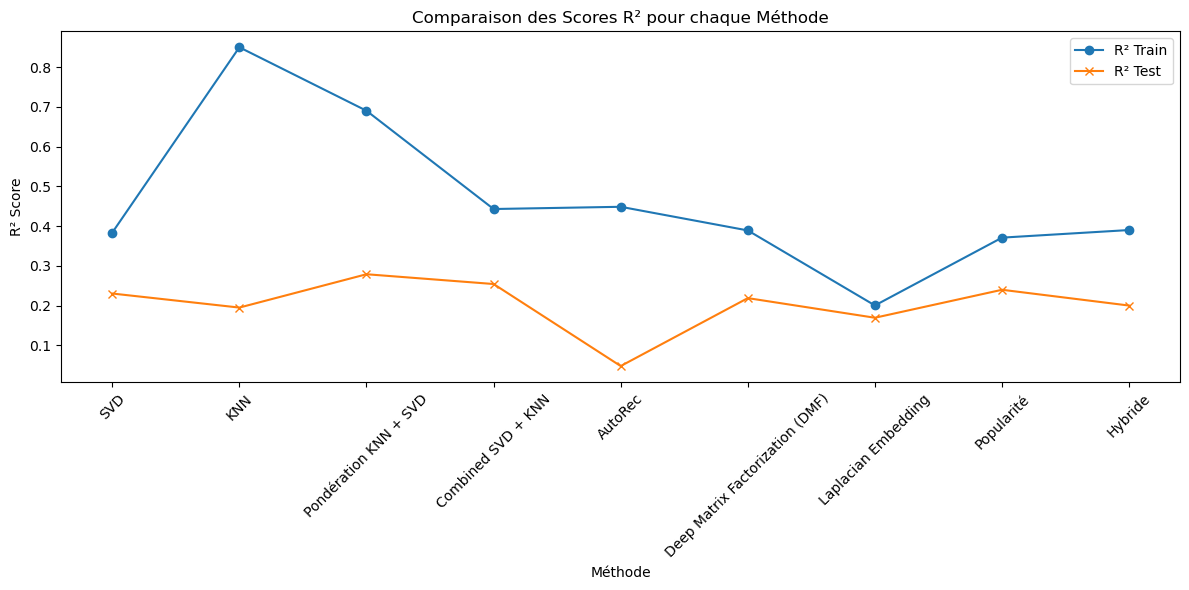

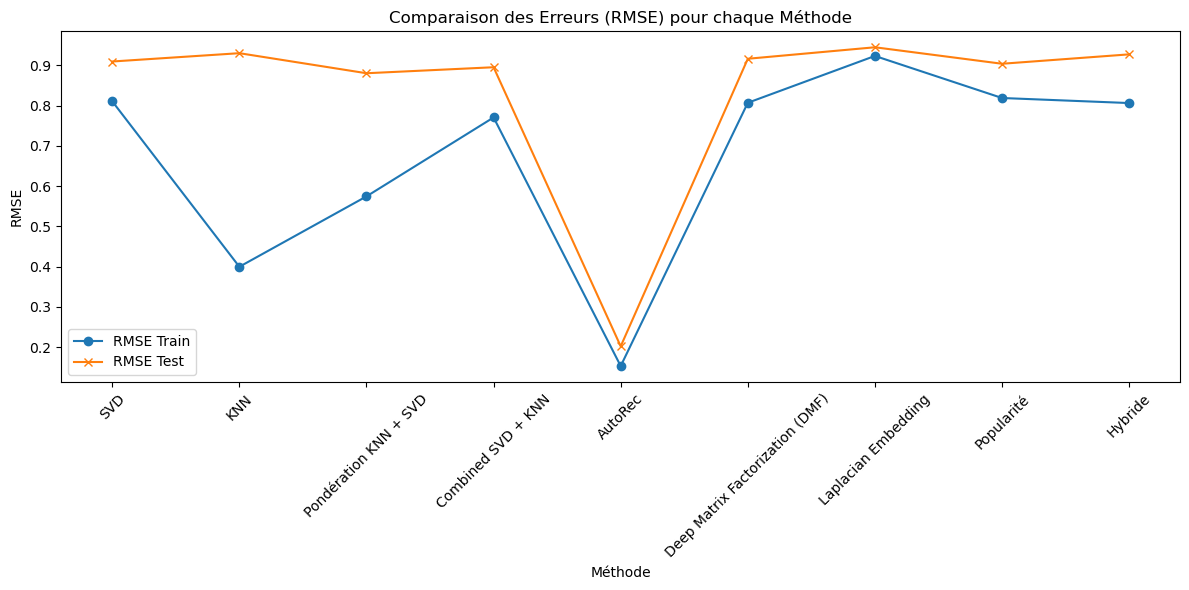

In [130]:
import matplotlib.pyplot as plt
import pandas as pd

# Données pour R² et RMSE
# Exemple : Charger les données R² dans un DataFrame
df_r2 = pd.DataFrame([
    {"Méthode": "SVD", "R² Train": r2_with_mask_train_svd, "R² Test": r2_with_mask_test_svd},
    {"Méthode": "KNN", "R² Train": r2_train_knn, "R² Test": r2_test_knn},
    {"Méthode": "Pondération KNN + SVD", "R² Train": r2_train_pond_knn_svd, "R² Test": r2_test_pond_knn_svd},
    {"Méthode": "Combined SVD + KNN", "R² Train": r2_train_combined, "R² Test": r2_test_combined},
    {"Méthode": "AutoRec", "R² Train": r2_train_autorec, "R² Test": r2_test_autorec},
    {"Méthode": "Deep Matrix Factorization (DMF)", "R² Train": r2_train_dmf, "R² Test": r2_test_dmf},
    {"Méthode": "Laplacian Embedding", "R² Train": r2_train_laplacian, "R² Test": r2_test_laplacian},
    {"Méthode": "Popularité", "R² Train": r2_train_popularity, "R² Test": r2_test_popularity},
    {"Méthode": "Hybride", "R² Train": r2_train_hybrid, "R² Test": r2_test_hybrid}
])

df_rmse = pd.DataFrame([
    {"Méthode": "SVD", "RMSE Train": rmse_with_mask_train_svd, "RMSE Test": rmse_with_mask_test_svd},
    {"Méthode": "KNN", "RMSE Train": rmse_train_knn, "RMSE Test": rmse_test_knn},
    {"Méthode": "Pondération KNN + SVD", "RMSE Train": rmse_train_pond_knn_svd, "RMSE Test": rmse_test_pond_knn_svd},
    {"Méthode": "Combined SVD + KNN", "RMSE Train": rmse_train_combined, "RMSE Test": rmse_test_combined},
    {"Méthode": "AutoRec", "RMSE Train": rmse_train_autorec, "RMSE Test": rmse_test_autorec},
    {"Méthode": "Deep Matrix Factorization (DMF)", "RMSE Train": rmse_train_dmf, "RMSE Test": rmse_test_dmf},
    {"Méthode": "Laplacian Embedding", "RMSE Train": rmse_train_laplacian, "RMSE Test": rmse_test_laplacian},
    {"Méthode": "Popularité", "RMSE Train": rmse_train_popularity, "RMSE Test": rmse_test_popularity},
    {"Méthode": "Hybride", "RMSE Train": rmse_train_hybrid, "RMSE Test": rmse_test_hybrid}
])

# Tracer le R² pour chaque méthode
plt.figure(figsize=(12, 6))
plt.plot(df_r2["Méthode"], df_r2["R² Train"], marker='o', label="R² Train")
plt.plot(df_r2["Méthode"], df_r2["R² Test"], marker='x', label="R² Test")
plt.xlabel("Méthode")
plt.ylabel("R² Score")
plt.title("Comparaison des Scores R² pour chaque Méthode")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Tracer le RMSE pour chaque méthode
plt.figure(figsize=(12, 6))
plt.plot(df_rmse["Méthode"], df_rmse["RMSE Train"], marker='o', label="RMSE Train")
plt.plot(df_rmse["Méthode"], df_rmse["RMSE Test"], marker='x', label="RMSE Test")
plt.xlabel("Méthode")
plt.ylabel("RMSE")
plt.title("Comparaison des Erreurs (RMSE) pour chaque Méthode")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


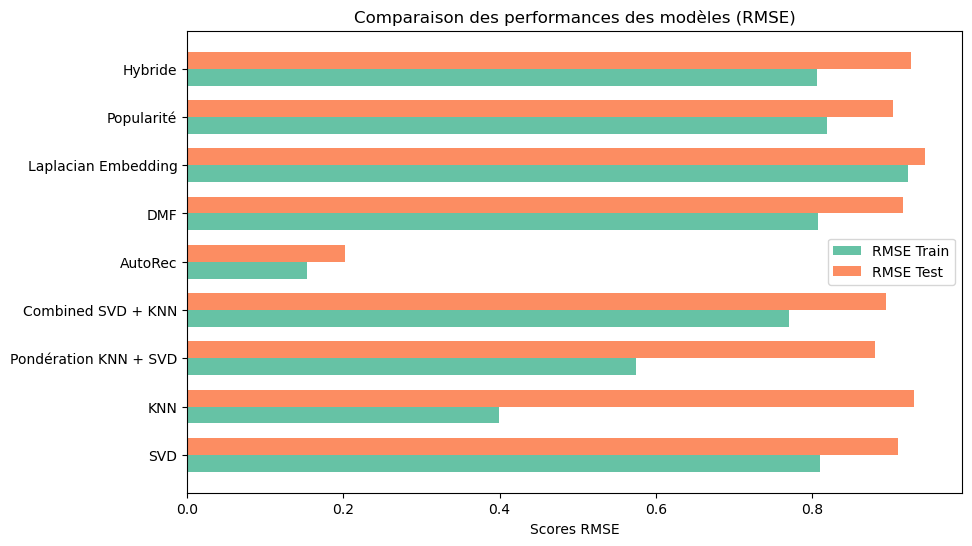

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des méthodes pour l'affichage
methods = ["SVD", "KNN", "Pondération KNN + SVD", "Combined SVD + KNN", 
           "AutoRec", "DMF", "Laplacian Embedding", "Popularité", "Hybride"]

# RMSE Train et Test
rmse_train = [rmse_with_mask_train_svd, rmse_train_knn, rmse_train_pond_knn_svd, rmse_train_combined, 
              rmse_train_autorec, rmse_train_dmf, rmse_train_laplacian, rmse_train_popularity, rmse_train_hybrid]
rmse_test = [rmse_with_mask_test_svd, rmse_test_knn, rmse_test_pond_knn_svd, rmse_test_combined, 
             rmse_test_autorec, rmse_test_dmf, rmse_test_laplacian, rmse_test_popularity, rmse_test_hybrid]

# Création de la figure pour RMSE
fig, ax = plt.subplots(figsize=(10, 6))

# Largeur des barres
bar_width = 0.35

# Position des barres sur l'axe des y
index = np.arange(len(methods))

# Création des barres pour RMSE Train et Test
bar1 = ax.barh(index - bar_width/2, rmse_train, bar_width, label="RMSE Train", color="#66c2a5")
bar2 = ax.barh(index + bar_width/2, rmse_test, bar_width, label="RMSE Test", color="#fc8d62")

# Ajout des labels et du titre
ax.set_xlabel("Scores RMSE")
ax.set_title("Comparaison des performances des modèles (RMSE)")
ax.set_yticks(index)
ax.set_yticklabels(methods)

# Affichage de la légende
ax.legend()

# Affichage du graphique
plt.show()


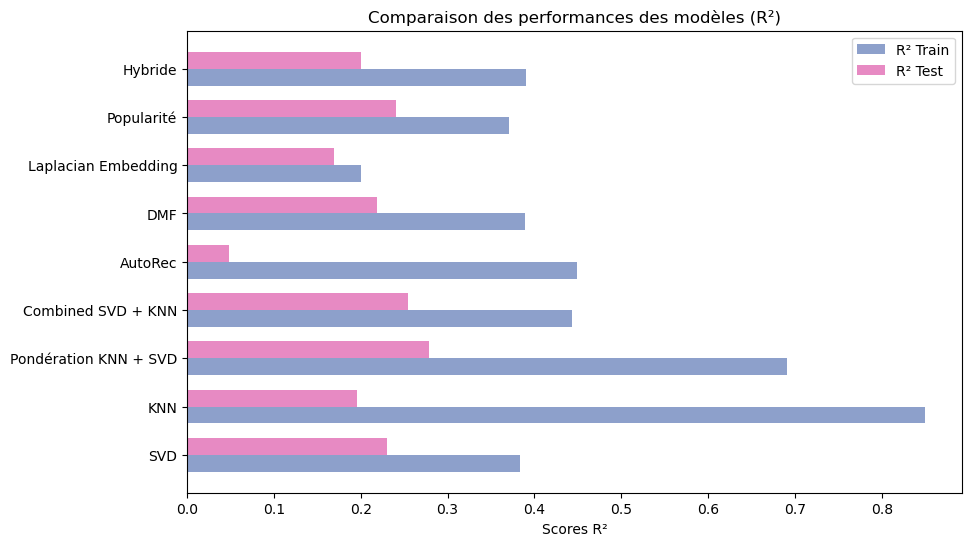

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des méthodes pour l'affichage
methods = ["SVD", "KNN", "Pondération KNN + SVD", "Combined SVD + KNN", 
           "AutoRec", "DMF", "Laplacian Embedding", "Popularité", "Hybride"]

# R² Train et Test
r2_train = [r2_with_mask_train_svd, r2_train_knn, r2_train_pond_knn_svd, r2_train_combined, 
            r2_train_autorec, r2_train_dmf, r2_train_laplacian, r2_train_popularity, r2_train_hybrid]
r2_test = [r2_with_mask_test_svd, r2_test_knn, r2_test_pond_knn_svd, r2_test_combined, 
           r2_test_autorec, r2_test_dmf, r2_test_laplacian, r2_test_popularity, r2_test_hybrid]

# Création de la figure pour R²
fig, ax = plt.subplots(figsize=(10, 6))

# Largeur des barres
bar_width = 0.35

# Position des barres sur l'axe des y
index = np.arange(len(methods))

# Création des barres pour R² Train et Test
bar1 = ax.barh(index - bar_width/2, r2_train, bar_width, label="R² Train", color="#8da0cb")
bar2 = ax.barh(index + bar_width/2, r2_test, bar_width, label="R² Test", color="#e78ac3")

# Ajout des labels et du titre
ax.set_xlabel("Scores R²")
ax.set_title("Comparaison des performances des modèles (R²)")
ax.set_yticks(index)
ax.set_yticklabels(methods)

# Affichage de la légende
ax.legend()

# Affichage du graphique
plt.show()
